## Import Data

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import sys
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
import joblib
import optuna

import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from rdkit import Chem
from rdkit.Chem import AllChem, MolFromSmiles
from rdkit.Chem import rdMolDescriptors as rd
from eosce.models import ErsiliaCompoundEmbeddings
import torch as th
import torch.nn.functional as fn

/home/affiah/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-30 19:27:03.092614: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-30 19:27:03.714329: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 19:27:03.714450: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 19:27:03.719247: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one 

In [15]:
# df = pd.read_csv('data/smiles_embeddings_all.csv')
# df.shape

(8807, 403)

In [3]:
# # Drop the untitled column
# df.drop(['Unnamed: 0'], inplace=True, axis=1)
# df.head()

,DrugBankID,SMILES,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,embedding_390,embedding_391,embedding_392,embedding_393,embedding_394,embedding_395,embedding_396,embedding_397,embedding_398,embedding_399
0,Compound::DB00006,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,-0.659347,-0.344230,-0.578348,-0.670077,0.073021,-0.844866,-0.529099,-0.797582,...,0.722160,-0.361777,-0.069529,0.719951,0.765324,-0.828312,-0.750704,-0.360401,-0.359896,-0.820253
1,Compound::DB00007,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,-0.606968,-0.781302,-0.730112,-0.868258,0.363371,-0.388290,0.217138,-0.640213,...,-0.355017,0.657896,0.039386,-0.395858,-0.218164,-0.540272,-0.603087,-0.853275,0.545669,-0.836144
2,Compound::DB00014,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,-0.470256,-0.885203,-0.623956,-0.507102,0.395201,-0.298908,-0.156826,-0.697836,...,-0.430036,0.563329,0.419391,-0.074537,0.266462,-0.631508,-0.637233,-0.816603,0.416263,-0.720862
3,Compound::DB00027,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,-0.761337,-0.709398,0.665223,-0.388625,0.218644,-0.416196,0.594226,-0.497919,...,-0.721291,0.630432,0.817134,0.515158,-0.247925,-0.523338,-0.827212,-0.751571,-0.640211,-0.756264
4,Compound::DB00035,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,-0.764784,-0.956786,-0.445434,-0.611626,0.335249,0.044306,-0.635370,-0.706563,...,-0.204678,-0.404126,-0.018485,-0.401169,0.025806,-0.664728,-0.856459,-0.417736,-0.386456,-0.626406


## Split data into train and test set 
Store the data as a CSV file.

In [4]:
# Split the DataFrame into train and test sets (80% train, 20% test)
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# # Save the train and test sets to CSV files
# train_df.to_csv('data/train.csv', index=False)
# test_df.to_csv('data/test.csv', index=False)

## Ersilia Descriptor Model

In [5]:
# train_df = pd.read_csv('data/train.csv')
# test_df = pd.read_csv('data/test.csv')

In [6]:
# # Function to calculate Ersilia descriptors
# def calculate_ersilia_descriptors(smiles):
#     model = ErsiliaCompoundEmbeddings()
#     embeddings = model.transform([smiles])
#     return embeddings

# # Function to preprocess data and create embeddings
# def preprocess_data(df):
#     # Get the target embeddings
#     embeddings = df.iloc[:, 2:].values
#     # create Ersilia descriptor columns
#     df['ersilia_descriptors'] = df['SMILES'].apply(calculate_ersilia_descriptors)
#     df = df.dropna()
#     # Extract the descriptors as a NumPy array
#     ersilia_descriptors = np.vstack(df['ersilia_descriptors'].values)
#     return ersilia_descriptors, embeddings

In [7]:
# # The ersilia descriptor is X, our features
# # The embeddings is y, our target variable
# X_train, y_train = preprocess_data(train_df)
# X_test, y_test = preprocess_data(test_df)

# print("The length of X_train is:", len(X_train))
# print("The length of X_test is:", len(X_test))

[13:21:00] Unusual charge on atom 0 number of radical electrons set to zero


The length of X_train is: 7045
The length of X_test is: 1762


Save the ersilia embeddings since it takes a long time to convert them.

In [2]:
# # Specify the directory
directory = 'data/ersilia_embeddings/'

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

# # Save the variables as text files
# np.savetxt(os.path.join(directory, 'X_train_ersilia.txt'), X_train)
# np.savetxt(os.path.join(directory, 'y_train_ersilia.txt'), y_train)
# np.savetxt(os.path.join(directory, 'X_test_ersilia.txt'), X_test)
# np.savetxt(os.path.join(directory, 'y_test_ersilia.txt'), y_test)

In [3]:
# Load the variables as NumPy arrays
X_train = np.loadtxt(os.path.join(directory, 'X_train_ersilia.txt'))
y_train = np.loadtxt(os.path.join(directory, 'y_train_ersilia.txt'))
X_test = np.loadtxt(os.path.join(directory, 'X_test_ersilia.txt'))
y_test = np.loadtxt(os.path.join(directory, 'y_test_ersilia.txt'))

In [4]:
print(X_train.shape)
print(X_train)

(7045, 1024)
[[-0.02297795 -0.04393283 -0.00267219 ... -0.00575614 -0.08817158
   0.0451123 ]
 [ 0.01728612 -0.01224638 -0.06066136 ... -0.01870611 -0.05308999
  -0.02502198]
 [ 0.14361586  0.1458011  -0.1337858  ... -0.0482729   0.01063045
  -0.10152555]
 ...
 [ 0.27700824  0.19359195 -0.22861645 ... -0.02889996 -0.01134796
  -0.08853202]
 [-0.00341973  0.03548691  0.10431875 ... -0.01475573  0.01532023
   0.04705036]
 [ 0.12424359 -0.15632716 -0.07696831 ...  0.03071315 -0.12634373
   0.03119451]]


## Train Model with XGBoost

In [13]:
def objective(trial):
    params = {
        "objective": "reg:squarederror",
        "verbosity": 0,
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "n_jobs": -1,  # Set to -1 to use all available CPU cores
        "tree_method": "gpu_hist",  # Enable GPU acceleration
        "device": "cuda",  # Specify GPU as the device
    }

    # Create an XGBoost regressor with the suggested hyperparameters
    xgb_regressor = xgb.XGBRegressor(**params)

    # Create a MultiOutputRegressor with XGBoost
    multioutput_regressor = MultiOutputRegressor(xgb_regressor)

    # Train the model using only 1000 records
    multioutput_regressor.fit(X_train, y_train, verbose=True)

    # Make predictions on the validation set
    y_pred = multioutput_regressor.predict(X_test)

    # Calculate mean squared error for each target variable
    mse_per_target = np.mean((y_test - y_pred)**2, axis=0)
    print("mse per target", mse_per_target)

    # Average the mean squared errors across all target variables
    mse = np.mean(mse_per_target)
    return mse

In [14]:
# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Print the best hyperparameters
print('Best trial:')
trial = study.best_trial
print(f'Params: {trial.params}')
print(f'Mean Squared Error: {trial.value}')

[I 2023-12-30 13:06:24,831] A new study created in memory with name: no-name-661b65c0-977e-4009-8625-20806d72ba0e
[I 2023-12-30 14:23:50,445] Trial 0 finished with value: 0.2520350314003053 and parameters: {'n_estimators': 192, 'learning_rate': 0.041501486160792724, 'max_depth': 3, 'subsample': 0.7775262494755458, 'colsample_bytree': 0.5050183476125273, 'min_child_weight': 19}. Best is trial 0 with value: 0.2520350314003053.


mse per target [0.26786509 0.2419886  0.25333618 0.26617304 0.13867669 0.25110639
 0.17500679 0.28393827 0.25905866 0.26378339 0.23776017 0.27658397
 0.25503438 0.25863325 0.26973209 0.22935214 0.21219692 0.27515246
 0.27571899 0.24874004 0.17258045 0.25283235 0.25342312 0.24444734
 0.28471919 0.28042023 0.28580304 0.27289117 0.25020285 0.27456083
 0.27863542 0.28832215 0.28542793 0.24334851 0.268002   0.27737369
 0.24585574 0.27339145 0.28749791 0.25140559 0.27201633 0.22265684
 0.24981111 0.15886138 0.21658576 0.19775247 0.23512629 0.22717555
 0.26613546 0.25619781 0.2541103  0.26351802 0.28006601 0.24068661
 0.23150104 0.29366166 0.23181243 0.25604403 0.25949044 0.25014086
 0.20550004 0.2589779  0.2948729  0.22062313 0.25781155 0.27455631
 0.2879246  0.2887244  0.24818126 0.26472603 0.27289015 0.30167902
 0.21976298 0.24281516 0.22449472 0.26659688 0.21323394 0.24752046
 0.28246605 0.23781362 0.27865888 0.25555324 0.26311737 0.25962905
 0.23232202 0.27530028 0.29165012 0.27187476 0.

[I 2023-12-30 17:24:44,642] Trial 1 finished with value: 0.23989154995729764 and parameters: {'n_estimators': 206, 'learning_rate': 0.00442228587234113, 'max_depth': 5, 'subsample': 0.5425554743043828, 'colsample_bytree': 0.4240018455885253, 'min_child_weight': 1}. Best is trial 1 with value: 0.23989154995729764.


mse per target [0.25652126 0.22994246 0.23278164 0.25627808 0.13257549 0.25122259
 0.17159999 0.27790345 0.24302574 0.25610328 0.22197949 0.27577803
 0.2379053  0.24760576 0.2535251  0.21934111 0.2008135  0.27742557
 0.27115955 0.2586561  0.16645508 0.24001009 0.24365063 0.22927894
 0.26184536 0.25710098 0.2675992  0.25523659 0.23849549 0.26875218
 0.25880682 0.26948173 0.27933636 0.23412023 0.2640435  0.26601518
 0.24594435 0.25819111 0.26880627 0.23674501 0.25851718 0.22441564
 0.23623392 0.14522074 0.20713636 0.19122695 0.23281492 0.22434181
 0.26160266 0.24120123 0.25361901 0.25722714 0.26973243 0.22681471
 0.22404519 0.27247203 0.21978515 0.24611513 0.23633858 0.23416229
 0.19523062 0.2519287  0.27270158 0.20250526 0.24360177 0.25304845
 0.27743368 0.27378033 0.22832109 0.25749546 0.25063905 0.28564696
 0.20610155 0.22429403 0.2162448  0.25853161 0.1985529  0.23720279
 0.26625111 0.22471829 0.25775385 0.24902702 0.24925391 0.24627643
 0.21877247 0.25626981 0.27333331 0.25603033 0.

[I 2023-12-30 18:23:35,464] Trial 2 finished with value: 0.2411279904970915 and parameters: {'n_estimators': 213, 'learning_rate': 0.008224740091440051, 'max_depth': 2, 'subsample': 0.859226573463718, 'colsample_bytree': 0.6105387325750644, 'min_child_weight': 4}. Best is trial 1 with value: 0.23989154995729764.


mse per target [0.25512277 0.23265201 0.23592006 0.26010806 0.13286218 0.25094705
 0.17118356 0.27841502 0.24453573 0.25505328 0.22371401 0.27703945
 0.23814479 0.25009235 0.25485571 0.22046874 0.20179889 0.27811763
 0.27479815 0.25666085 0.16534897 0.24104355 0.24284357 0.23084547
 0.26316473 0.25894028 0.26810463 0.25682026 0.24140362 0.2703819
 0.26220766 0.27081689 0.28268038 0.23740516 0.26479408 0.26683736
 0.24704785 0.25974408 0.26772454 0.2378485  0.26032069 0.22459345
 0.23664329 0.14825753 0.20755013 0.19238961 0.23676705 0.22657085
 0.26132686 0.24201676 0.25469575 0.25841246 0.26904319 0.22946226
 0.22444011 0.27455383 0.22003376 0.24666521 0.23991424 0.23559727
 0.19577373 0.25343725 0.2737815  0.20363449 0.24499079 0.25282196
 0.28059102 0.27349649 0.23160175 0.25786423 0.25249711 0.28576187
 0.2085956  0.22296966 0.21638404 0.26095202 0.19930836 0.23810143
 0.26827798 0.22655053 0.26184221 0.2493717  0.25050335 0.24946884
 0.21991194 0.25822608 0.27623543 0.25563586 0.1

In [ ]:
# Extract the best hyperparameters
best_params = study.best_trial.params
# Create an XGBoost regressor with the best hyperparameters
best_xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
# Create a MultiOutputRegressor with XGBoost
best_multioutput_regressor = MultiOutputRegressor(best_xgb_regressor)
# Train the final model using the full training set
best_multioutput_regressor.fit(X_train, y_train)
# Make predictions on your test set or perform any further evaluation
y_test_pred = best_multioutput_regressor.predict(X_test)

In [6]:
# Save the trained model to a file
model_filename = 'xgboost_ersilia_model.bin'
joblib.dump(best_multioutput_regressor, model_filename)

['xgboost_ersilia_model.bin']

In [7]:
# Load the saved model
model = joblib.load('xgboost_ersilia_model.bin')

# Make predictions on the test set
ersilia_embeddings = model.predict(X_test)
train_ersilia_embeddings = model.predict(X_train)
print(ersilia_embeddings)
print(train_ersilia_embeddings)

[[-0.07899999  0.30920705 -0.13696547 ... -0.00659788  0.23647861
  -0.09126461]
 [ 0.05572769  0.34888887 -0.18766168 ...  0.1103633   0.08489307
   0.00785349]
 [-0.08478843  0.31043658 -0.14896715 ...  0.02790663  0.24745879
  -0.08395549]
 ...
 [-0.05213704  0.26200622 -0.14316317 ... -0.0187642   0.30700952
  -0.21352328]
 [ 0.00541408  0.27889225 -0.1662331  ...  0.00152017  0.20536125
  -0.14212175]
 [ 0.00885295  0.25737736 -0.14134476 ...  0.08015323  0.14006184
  -0.09486989]]
[[ 0.0423996   0.33532542 -0.08445363 ...  0.02313605  0.16196284
  -0.04502711]
 [-0.03908692  0.29327655 -0.19945353 ...  0.00468447  0.20782316
  -0.05374184]
 [-0.20114018  0.35272107 -0.07397906 ... -0.06954383  0.33935887
  -0.00328591]
 ...
 [-0.00345439  0.27392328 -0.15019809 ... -0.03201444  0.274702
  -0.19296993]
 [-0.06204021  0.30026454 -0.15650174 ... -0.02245949  0.36414626
  -0.31319916]
 [-0.03941872  0.27003303 -0.01303912 ... -0.1468251   0.30145139
  -0.1718874 ]]


In [8]:
# Calculate R-squared score for each output
r2_scores_test = [r2_score(y_test[:, i], ersilia_embeddings[:, i]) for i in range(y_test.shape[1])]
r2_scores_train = [r2_score(y_train[:, i], train_ersilia_embeddings[:, i]) for i in range(y_train.shape[1])]

# Print the average R-squared score
average_r2_test = np.mean(r2_scores_test)
average_r2_train = np.mean(r2_scores_train)

print(f'Average Train R-squared Score: {average_r2_train:.4f}')
print(f'Average Test R-squared Score: {average_r2_test:.4f}')

Average Train R-squared Score: 0.1309
Average Test R-squared Score: 0.0482


## Evaluate Embeddings

### Column-wise evaluation
Compare the embeddings based on the index (original and predicted) of all the drugs


In [10]:
def col_comparison(embedding_index, original_embeddings=y_test, predicted_embeddings=ersilia_embeddings):
    '''Function to compare the original embeddings with the predicted embeddings.
    It uses a regression plot and Pearson correlation for comparison.
        
    Parameter
    ----------
    embedding_index (int): number specifying the embedding you want to compare. It ranges from 0-399.
    original_embeddings (np.array): The original embeddings from the knowledge graph.
    predicted_embeddingns (np.array): The embeddings predicted by the model
    
    Returns
    -------
    pearson_corr (np.array): person correlation score.
    '''
    # Extract embedding_index for both arrays
    embedding_index_y_test = original_embeddings[:, embedding_index]
    embedding_index_mf = predicted_embeddings[:, embedding_index]

    # Create a DataFrame for Seaborn plotting
    emb_df = pd.DataFrame({'Embedding_index_y_test': embedding_index_y_test,
                       'Embedding_index_mf': embedding_index_mf})

    # Plot the regression plot with Pearson correlation
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Embedding_index_y_test', y='Embedding_index_mf', data=emb_df, scatter_kws={'s': 10})
    plt.title(f'Regression Plot of Embedding_{embedding_index}  for Original and Predicted Embeddings')
    plt.xlabel(f'Original Embedding {embedding_index}')
    plt.ylabel(f'Predicted Embedding {embedding_index}')
    plt.show()

    # Calculate the Pearson correlation
    pearson_corr = np.corrcoef(embedding_index_y_test, embedding_index_mf)[0, 1]
    print(f'Pearson Correlation: {pearson_corr:.4f}')

#### Test Set

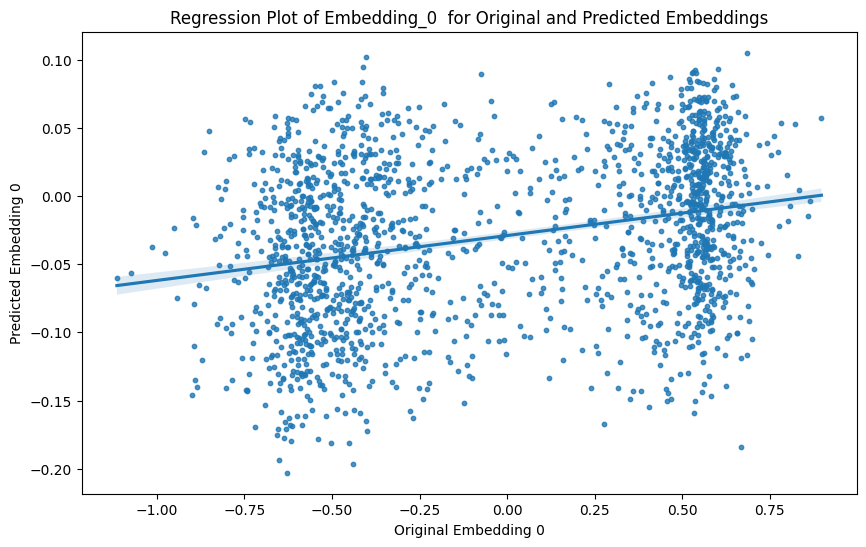

Pearson Correlation: 0.2822


In [11]:
col_comparison(0)

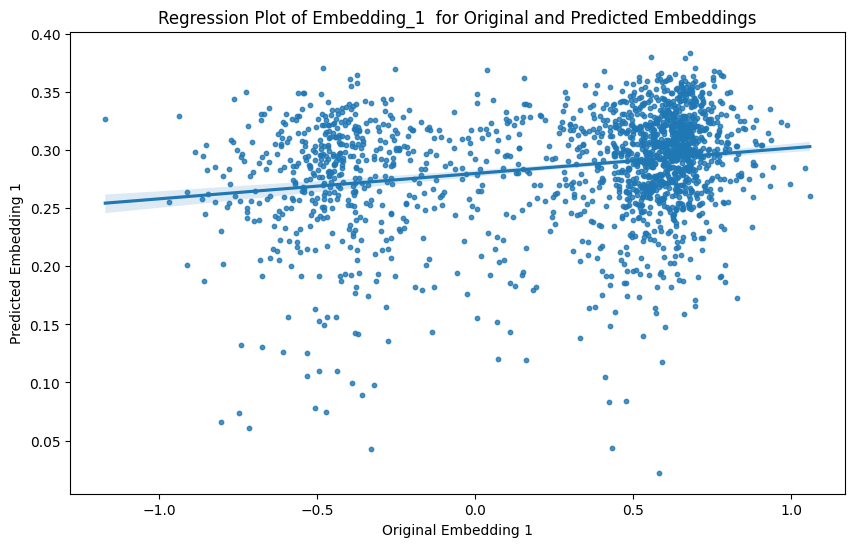

Pearson Correlation: 0.2174


In [12]:
col_comparison(1)

#### Train Set

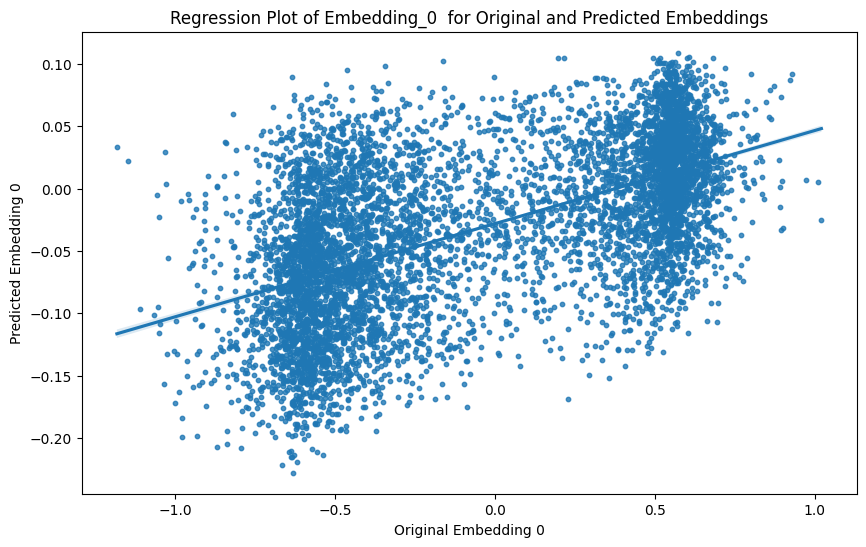

Pearson Correlation: 0.5823


In [13]:
col_comparison(0, 
               original_embeddings=y_train, 
               predicted_embeddings=train_ersilia_embeddings)

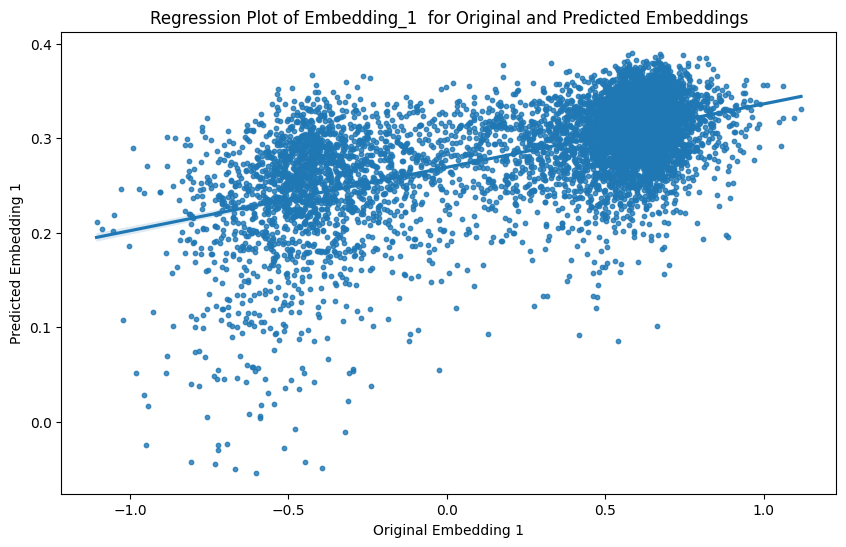

Pearson Correlation: 0.5804


In [14]:
col_comparison(1, 
               original_embeddings=y_train, 
               predicted_embeddings=train_ersilia_embeddings)

### Row-wise Comparison of Embeddings
Compare the 400 embeddings (original and predicted) of a particular drug

In [15]:
def row_comparison(drug_index, original_embeddings=y_test, predicted_embeddings=ersilia_embeddings):
    '''Function to compare the 400 original embeddings with the predicted embeddings for a drug
    It uses a regression plot and Pearson correlation for comparison.
        
    Parameter
    ----------
    drug_index (int): number specifying the drug embedding you want to compare. It ranges from 0-1761.
    original_embeddings (np.array): The original embeddings from the knowledge graph.
    predicted_embeddingns (np.array): The embeddings predicted by the model
    
    Returns
    -------
    pearson_corr (np.array): person correlation score.
    '''
    # Extract embeddings for the specified drug
    embeddings_y_test = original_embeddings[drug_index]
    embeddings_mf = predicted_embeddings[drug_index]

    # Create a DataFrame for Seaborn plotting
    df = pd.DataFrame({'Embeddings_y_test': embeddings_y_test,
                       'Embeddings_mf': embeddings_mf})

    # Plot the regression plot
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Embeddings_y_test', y='Embeddings_mf', data=df, scatter_kws={'s': 10})
    plt.title(f'Regression Plot of Embeddings for Drug {drug_index}')
    plt.xlabel(f'Original Embeddings for Drug {drug_index}')
    plt.ylabel(f'Predicted Embeddings for Drug {drug_index}')
    plt.show()

     # Calculate the Pearson correlation
    pearson_corr = np.corrcoef(embeddings_y_test, embeddings_mf)[0, 1]
    print(f'Pearson Correlation: {pearson_corr:.4f}')

#### Test Set

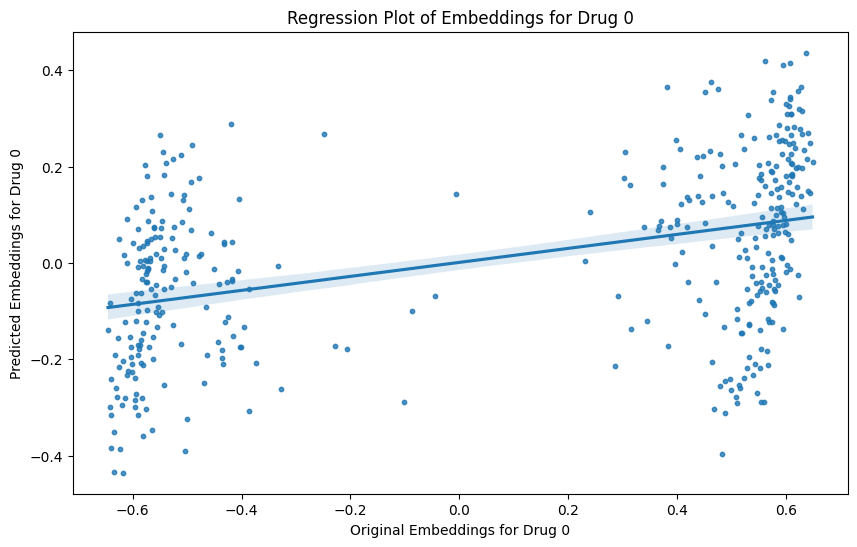

Pearson Correlation: 0.4229


In [16]:
row_comparison(0)

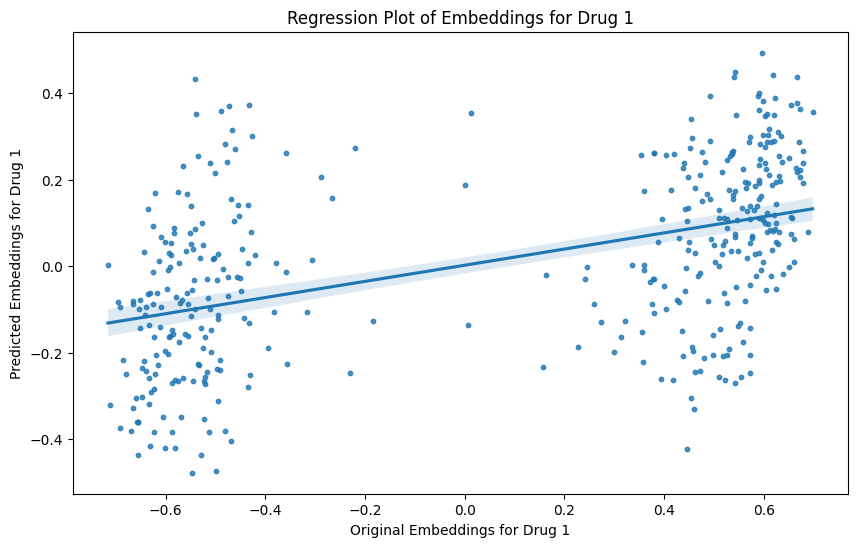

Pearson Correlation: 0.4787


In [17]:
row_comparison(1)

#### Train Set

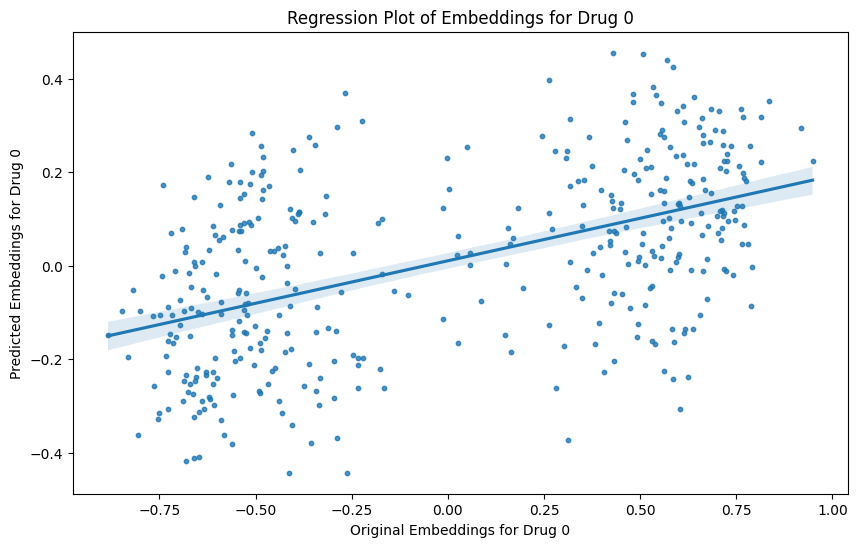

Pearson Correlation: 0.5153


In [18]:
row_comparison(0, 
               original_embeddings=y_train, 
               predicted_embeddings=train_ersilia_embeddings)

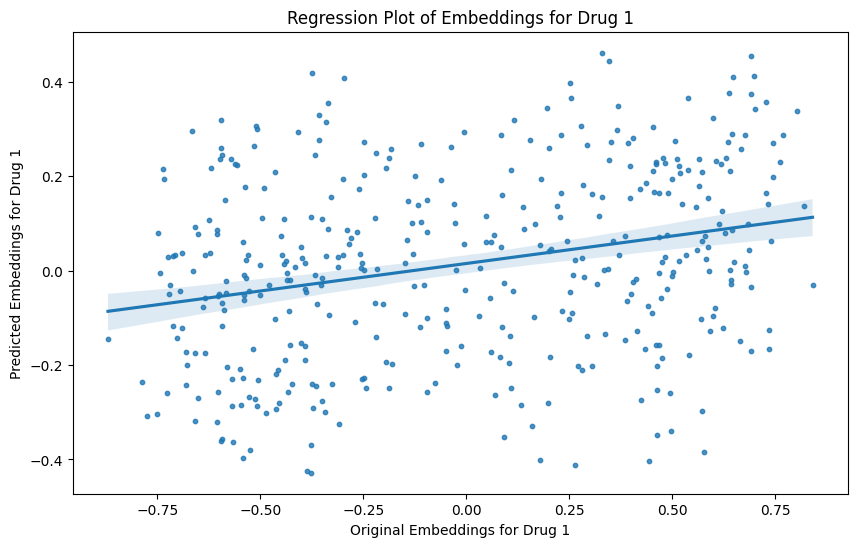

Pearson Correlation: 0.2742


In [19]:
row_comparison(1, 
               original_embeddings=y_train, 
               predicted_embeddings=train_ersilia_embeddings)

## Predict the Edge Score

In [20]:
COV_disease_list = [
'Disease::SARS-CoV2 E',
'Disease::SARS-CoV2 M',
'Disease::SARS-CoV2 N',
'Disease::SARS-CoV2 Spike',
'Disease::SARS-CoV2 nsp1',
'Disease::SARS-CoV2 nsp10',
'Disease::SARS-CoV2 nsp11',
'Disease::SARS-CoV2 nsp12',
'Disease::SARS-CoV2 nsp13',
'Disease::SARS-CoV2 nsp14',
'Disease::SARS-CoV2 nsp15',
'Disease::SARS-CoV2 nsp2',
'Disease::SARS-CoV2 nsp4',
'Disease::SARS-CoV2 nsp5',
'Disease::SARS-CoV2 nsp5_C145A',
'Disease::SARS-CoV2 nsp6',
'Disease::SARS-CoV2 nsp7',
'Disease::SARS-CoV2 nsp8',
'Disease::SARS-CoV2 nsp9',
'Disease::SARS-CoV2 orf10',
'Disease::SARS-CoV2 orf3a',
'Disease::SARS-CoV2 orf3b',
'Disease::SARS-CoV2 orf6',
'Disease::SARS-CoV2 orf7a',
'Disease::SARS-CoV2 orf8',
'Disease::SARS-CoV2 orf9b',
'Disease::SARS-CoV2 orf9c',
'Disease::MESH:D045169',
'Disease::MESH:D045473',
'Disease::MESH:D001351',
'Disease::MESH:D065207',
'Disease::MESH:D028941',
'Disease::MESH:D058957',
'Disease::MESH:D006517'
]

treatment = ['Hetionet::CtD::Compound:Disease','GNBR::T::Compound:Disease']


gamma = 12.0

def transE_l2(head, rel, tail):
    score = head + rel - tail
    return gamma - th.norm(score, p=2, dim=-1)


def edge_score(embeddings):
    '''Function to calculate the edge scores.

    Argument
    ---------
    embeddings (array). Array of size 400 containing 
            the embeddings of the SMILES molecule.

    Returns
    --------
    scores (tensor). Tensor showing the edge score for 
            each disease based on the drug_embeddings, relation_embeddings,
            and COVID_disease embeddings.
    '''
    
    # Load entity and relation mapping files
    entity_idmap_file = 'data/entities.tsv'
    relation_idmap_file = 'data/relations.tsv'

    # Get drugname/disease name to entity ID mappings
    entity_map = {}
    entity_id_map = {}
    relation_map = {}
    
    with open(entity_idmap_file, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t', fieldnames=['name', 'id'])
        for row_val in reader:
            entity_map[row_val['name']] = int(row_val['id'])
            entity_id_map[int(row_val['id'])] = row_val['name']

    with open(relation_idmap_file, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t', fieldnames=['name', 'id'])
        for row_val in reader:
            relation_map[row_val['name']] = int(row_val['id'])

    # Handle the ID mapping
    # drug_ids = [entity_map[drug] for drug in drug_list]
    disease_ids = [entity_map[disease] for disease in COV_disease_list]
    treatment_rid = [relation_map[treat] for treat in treatment]

    # Load embeddings
    entity_emb = np.load('data/DRKG_TransE_l2_entity.npy')
    rel_emb = np.load('data/DRKG_TransE_l2_relation.npy')

    # drug_ids = th.tensor(drug_ids).long()
    disease_ids = th.tensor(disease_ids).long()
    treatment_rid = th.tensor(treatment_rid)

    # Use our model's embeddings here
    drug_emb = th.tensor(embeddings)
    # drug_emb = th.tensor(entity_emb[drug_ids]) # get embeddings from knowledge graph
    
    treatment_embs = [th.tensor(rel_emb[rid]) for rid in treatment_rid]

    scores_per_disease = []
    for rid in range(len(treatment_embs)):
        treatment_emb=treatment_embs[rid]
        for disease_id in disease_ids:
            disease_emb = entity_emb[disease_id]
            score = fn.logsigmoid(transE_l2(drug_emb, treatment_emb, disease_emb))
            scores_per_disease.append(score)
            
    # Convert scores_per_disease to a list of tensors
    scores_tensors = [th.tensor(scores, dtype=th.float32) for scores in scores_per_disease]
    # Get the first combo edge score
    return scores_tensors[0]

    # # Ensure the list of tensors is not empty before calculating the max
    # if scores_tensors:
    #     # Stack the list of tensors along a new dimension (axis 0)
    #     scores_tensor = th.stack(scores_tensors, dim=0)
    #     # Calculate the maximum score for each drug along the existing dimension (axis 0)
    #     max_scores, _ = th.max(scores_tensor, dim=0)
    #     # Print the shape and content of the max_scores tensor
    #     print("Shape of max_scores:", max_scores.shape)
    #     # print("Maximum scores for each drug:", max_scores.tolist())  # Use .tolist() to get a Python list
    #     return max_scores
    # else:
    #     print("The list of tensors is empty.")
    #     return None

In [21]:
# y_test has the original embeddings
# Predict the original_edge_score
original_edge_score = edge_score(y_test)

# Predict the ersilia descriptor edge score
ersilia_edge_score = edge_score(ersilia_embeddings)

/tmp/ipykernel_3992/31520054.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scores_tensors = [th.tensor(scores, dtype=th.float32) for scores in scores_per_disease]


In [22]:
ersilia_edge_score

tensor([-3.2121, -3.4074, -3.2383,  ..., -3.0375, -3.1948, -3.3308])

In [23]:
original_edge_score

tensor([-7.0180, -6.4491, -6.4137,  ..., -6.0347, -5.3829, -6.3878])

## Plot result

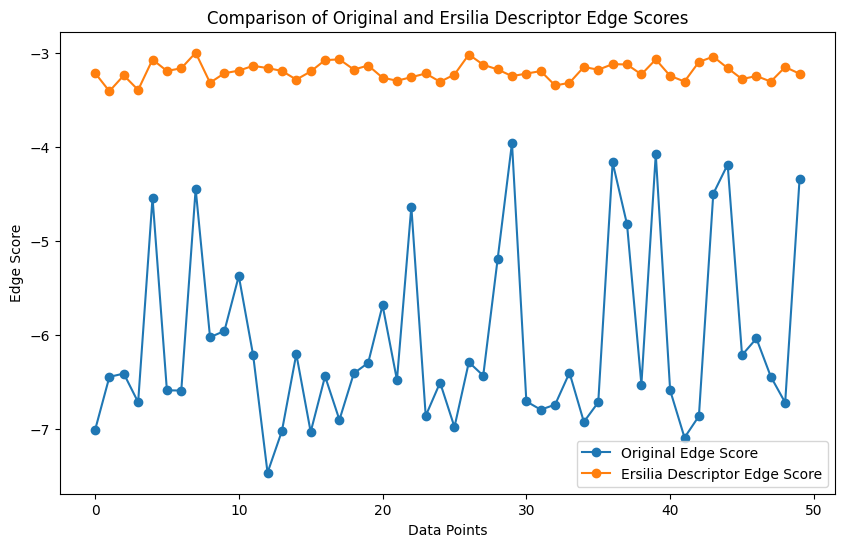

R-squared Score: -9.6424
Mean Squared Error: 8.8405


In [24]:
# Calculate R-squared score
r2 = r2_score(original_edge_score, ersilia_edge_score)

# Calculate Mean Squared Error
mse = mean_squared_error(original_edge_score, ersilia_edge_score)

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(original_edge_score[:50], label='Original Edge Score', marker='o')
plt.plot(ersilia_edge_score[:50], label='Ersilia Descriptor Edge Score', marker='o')
plt.title('Comparison of Original and Ersilia Descriptor Edge Scores')
plt.xlabel('Data Points')
plt.ylabel('Edge Score')
plt.legend()
plt.show()

# Print R-squared and MSE
print(f'R-squared Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

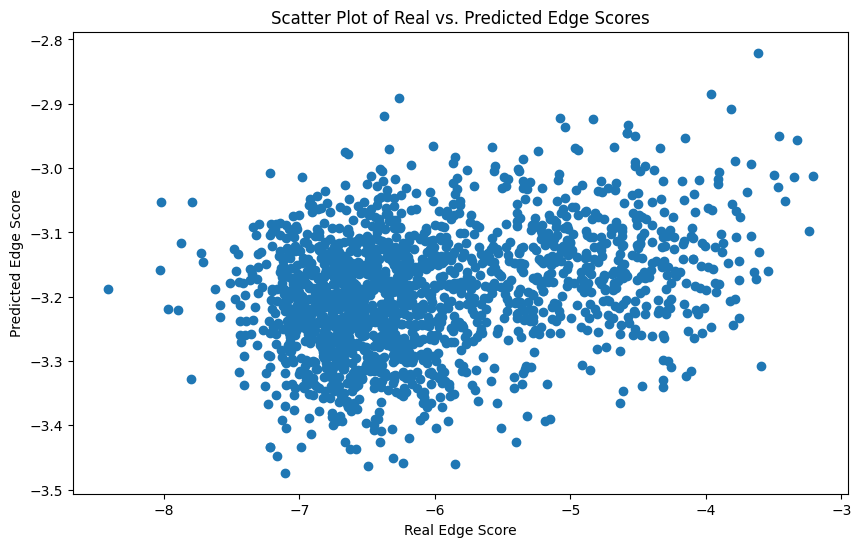

In [25]:
# Plot the scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x=original_edge_score, y=ersilia_edge_score)
plt.title('Scatter Plot of Real vs. Predicted Edge Scores')
plt.xlabel('Real Edge Score')
plt.ylabel('Predicted Edge Score')
plt.show()